<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [58]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [59]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [60]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,1,101)
print(alpha, beta)

0.5995321742306974 0.34030274658926074


In [61]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

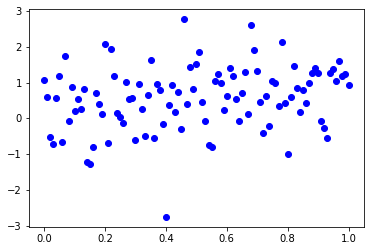

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')

In [63]:
def objective_linear(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

In [64]:
def objective_rational(params):
  alpha, beta = params
  return np.sum(((alpha/(1+x*beta))-y)**2)

**Conjugate Gradient Descent**

Linear Approximant

In [65]:
initial = [0,0]
result1_l = optimize.minimize(fun=objective_linear, x0=initial,method='CG', tol=0.001) 
result1_l

     fun: 74.69690194243843
     jac: array([1.90734863e-06, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.71703117, 0.20908123])

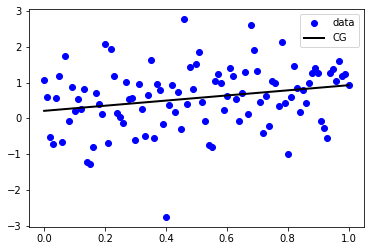

In [66]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result1_l.x[0],result1_l.x[1]), '-k', lw=2, label='CG')
ax.legend()

Rational Approximant



In [67]:
initial = [0,0]
result1_r = optimize.minimize(fun=objective_rational, x0=initial,method='CG', tol=0.001) 
result1_r

     fun: 74.99591656693272
     jac: array([8.58306885e-06, 8.58306885e-06])
 message: 'Optimization terminated successfully.'
    nfev: 90
     nit: 9
    njev: 22
  status: 0
 success: True
       x: array([ 0.34402987, -0.67161529])

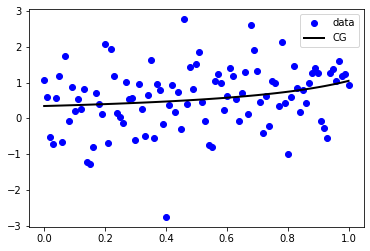

In [68]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result1_r.x[0],result1_r.x[1]), '-k', lw=2, label='CG')
ax.legend()

**Newton's Method**

Linear Approximant

In [69]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_linear, 0.001)
result2_l = optimize.minimize(fun=objective_linear, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result2_l

     fun: 74.69693526252868
     jac: array([6.88111470e-05, 3.62966972e-05])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 22
  status: 0
 success: True
       x: array([0.71800094, 0.20809639])

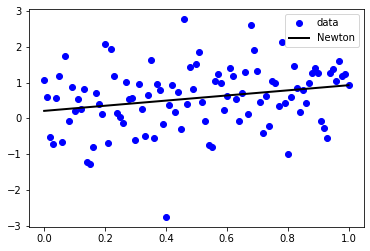

In [70]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result2_l.x[0],result2_l.x[1]), '-k', lw=2, label='Newton')
ax.legend()

Rational Approximant

In [71]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_rational, 0.001)
result2_r = optimize.minimize(fun=objective_rational, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result2_r

     fun: 74.99722342167398
     jac: array([ 0.1693847 , -0.20992926])
 message: 'Optimization terminated successfully.'
    nfev: 12
    nhev: 0
     nit: 9
    njev: 48
  status: 0
 success: True
       x: array([ 0.34016105, -0.67769782])

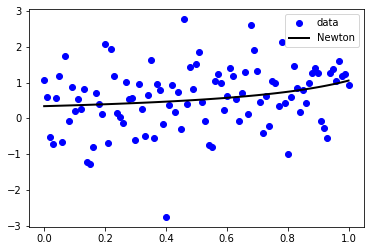

In [72]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result2_r.x[0],result2_r.x[1]), '-k', lw=2, label='Newton')
ax.legend()

**Levenberg-Marquardt algorithm**

Linear Approximant

In [73]:
result3_l = optimize.curve_fit(linear_fun, x, y, method='lm')[0]
result3_l

array([0.71703116, 0.20908124])

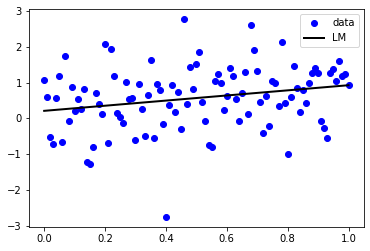

In [74]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result3_l[0],result3_l[1]), '-k', lw=2, label='LM')
ax.legend()

Rational Approximant

In [75]:
result3_r = optimize.curve_fit(rational_fun, x, y, method='lm')[0]
result3_r

array([ 0.34402694, -0.67162081])

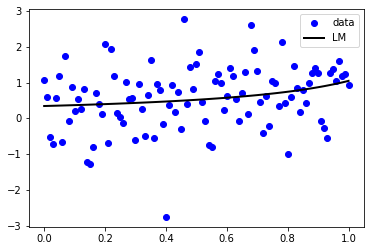

In [76]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result3_r[0],result3_r[1]), '-k', lw=2, label='LM')
ax.legend()

**Gradient Descent**

Linear Approximant

In [77]:
def GradientDescentLinear(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    der_alpha = np.sum(2*x*(alpha*x+beta-y))
    der_beta = np.sum(2*(alpha*x+beta-y))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [78]:
result4_l = GradientDescentLinear(x, y, 0, 0, 0.001)
print(result4_l)

(0.5968117419107619, 0.27351004038367654, 99)


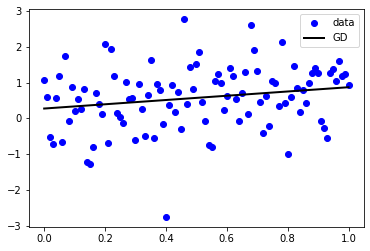

In [79]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result4_l[0],result4_l[1]), '-k', lw=2, label='GD')
ax.legend()

Rational Approximant

In [80]:
def GradientDescentRational(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    t = (1 + beta*x)
    der_alpha = np.sum(2*((alpha/t) - y)/t)
    der_beta = np.sum(2*alpha*x*(t*y - alpha)/(t**3))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [81]:
result4_r = GradientDescentRational(x, y, 0, 0, 0.001)
print(result4_r)

(0.3786521675519347, -0.6070216893602499, 99)


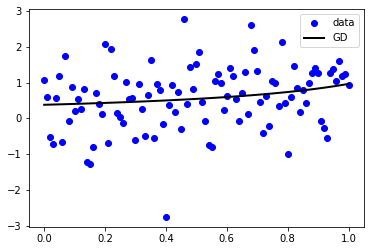

In [82]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result4_r[0],result4_r[1]), '-k', lw=2, label='GD')
ax.legend()

**Comparison**

Linear Approximant

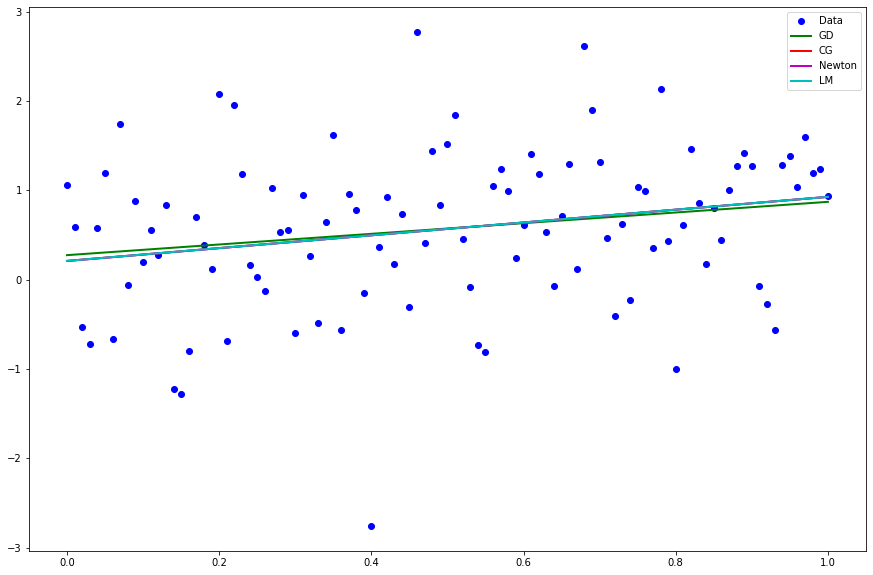

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x, y, 'ob', label='Data')
ax.plot(x, linear_fun(x, result4_l[0],result4_l[1]), '-g', lw=2, label='GD')
ax.plot(x, linear_fun(x, result1_l.x[0],result1_l.x[1]), '-r', lw=2, label='CG')
ax.plot(x, linear_fun(x, result2_l.x[0],result2_l.x[1]), '-m', lw=2, label='Newton')
ax.plot(x, linear_fun(x, result3_l[0],result3_l[1]), '-c', lw=2, label='LM')
ax.legend()

Rational Approximant

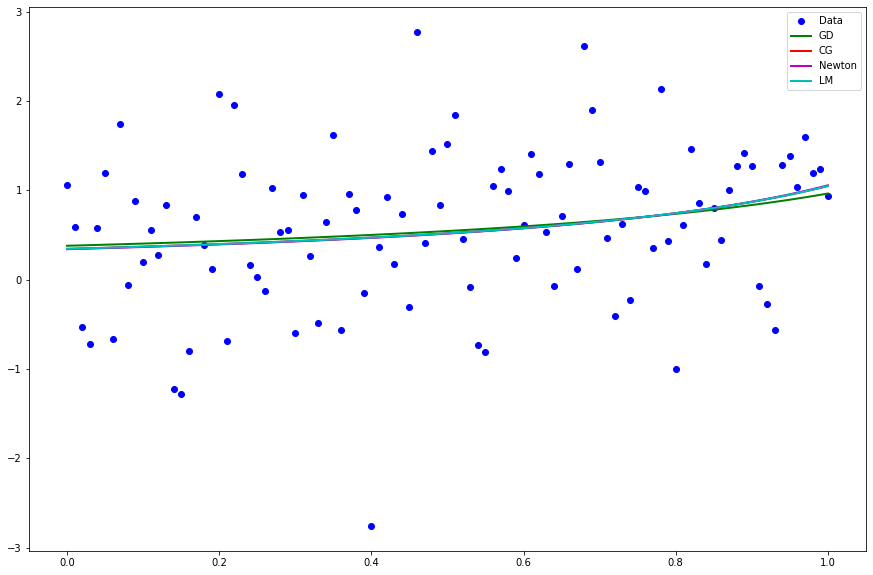

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x, y, 'ob', label='Data')
ax.plot(x, rational_fun(x, result4_r[0],result4_r[1]), '-g', lw=2, label='GD')
ax.plot(x, rational_fun(x, result1_r.x[0],result1_r.x[1]), '-r', lw=2, label='CG')
ax.plot(x, rational_fun(x, result2_r.x[0],result2_r.x[1]), '-m', lw=2, label='Newton')
ax.plot(x, rational_fun(x, result3_r[0],result3_r[1]), '-c', lw=2, label='LM')
ax.legend()